<a href="https://colab.research.google.com/github/IrfanKpm/Machine-Learning-Notes1/blob/main/_002_Supervised_Learning_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Models
Linear models are a class of models that are widely used in practice and have been
studied extensively in the last few decades, with roots going back over a hundred
years. Linear models make a prediction using a linear function of the input features,
which we will explain shortly



---
- ŷ = w[0] * x[0] + b
- ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b


In [1]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.1 MB/s eta 0:00:00


In [2]:
import mglearn

w[0]: 0.393906  b: -0.031804


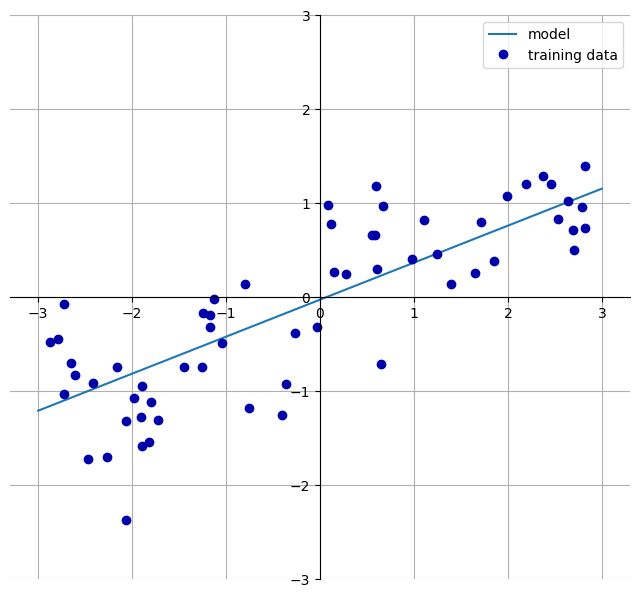

In [3]:
mglearn.plots.plot_linear_regression_wave()

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
lr = LinearRegression()
lr.fit(X_train,y_train)


print(f"lr coeff : {lr.coef_}")
print(f"lr.intercept_: {lr.intercept_}\n")
print(f"Training set score : {lr.score(X_train, y_train):.2f}")
print(f"Test set score : {lr.score(X_test, y_test):.2f}")

lr coeff : [0.39390555]
lr.intercept_: -0.031804343026759746

Training set score : 0.67
Test set score : 0.66


- The R² score (coefficient of determination) is around 0.66 for both training and test sets. This indicates that approximately 66% of the variance in the target variable can be explained by the model.



---

## Ridge regression

Ridge regression is also a linear model for regression, so the formula it uses to make
predictions is the same one used for ordinary least squares. In ridge regression,
though, the coefficients (w) are chosen not only so that they predict well on the train‐
ing data, but also to fit an additional constraint. We also want the magnitude of coef‐
ficients to be as small as possible; in other words, all entries of w should be close to
zero. Intuitively, this means each feature should have as little effect on the outcome as
possible (which translates to having a small slope), while still predicting well. This
constraint is an example of what is called regularization. Regularization means explic‐
itly restricting a model to avoid overfitting. The particular kind used by ridge regres‐
sion is known as L2 regularization

In [7]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(X_train, y_train)


print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


As you can see, the training set score of Ridge is lower than for LinearRegression,
while the test set score is higher. This is consistent with our expectation. With linear
regression, we were overfitting our data. Ridge is a more restricted model, so we are
less likely to overfit. A less complex model means worse performance on the training
set, but better generalization. As we are only interested in generalization perfor‐
mance, we should choose the Ridge model over the LinearRegression model.

The Ridge model makes a trade-off between the simplicity of the model (near-zero
coefficients) and its performance on the training set. How much importance the
model places on simplicity versus training set performance can be specified by the
user, using the alpha parameter. In the previous example, we used the default param‐
eter alpha=1.0. There is no reason why this will give us the best trade-off, though.
The optimum setting of alpha depends on the particular dataset we are using.
Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization. For example:


In [8]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.64


In [9]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.95
Test set score: 0.61


In [10]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


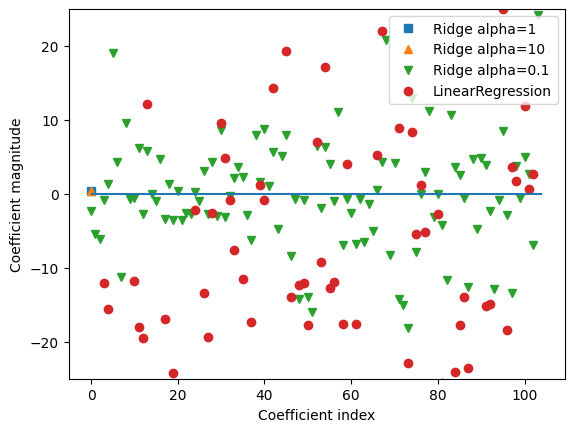

In [11]:
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

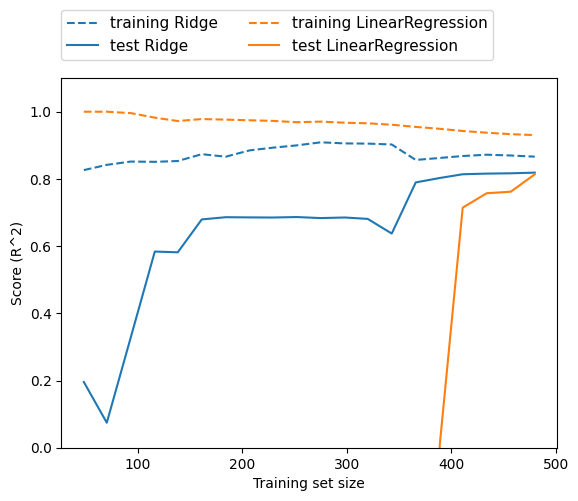

In [12]:
mglearn.plots.plot_ridge_n_samples()

## Lasso
An alternative to Ridge for regularizing linear regression is Lasso. As with ridge
regression, using the lasso also restricts coefficients to be close to zero, but in a
slightly different way, called L1 regularization.8
 The consequence of L1 regularization
is that when using the lasso, some coefficients are exactly zero. This means some fea‐
tures are entirely ignored by the model. This can be seen as a form of automatic fea‐
ture selection. Having some coefficients be exactly zero often makes a model easier to
interpret, and can reveal the most important features of your model.
Let’s apply the lasso to the extended Boston Housing dataset:


In [16]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


As you can see, Lasso does quite badly, both on the training and the test set. This
indicates that we are underfitting, and we find that it used only 4 of the 105 features.
Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls
how strongly coefficients are pushed toward zero. In the previous example, we used
the default of alpha=1.0. To reduce underfitting, let’s try decreasing alpha. When we
do this, we also need to increase the default setting of max_iter (the maximum num‐
ber of iterations to run):


In [17]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))


Training set score: 0.90
Test set score: 0.77
Number of features used: 33


A lower alpha allowed us to fit a more complex model, which worked better on the
training and test data. The performance is slightly better than using Ridge, and we are
using only 33 of the 105 features. This makes this model potentially easier to under‐
stand.
If we set alpha too low, however, we again remove the effect of regularization and end
up overfitting, with a result similar to LinearRegression:

In [18]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

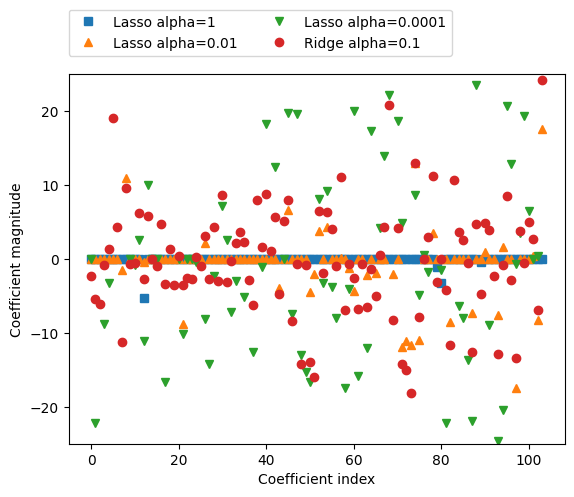

In [19]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")


## Linear models for classification
Linear models are also extensively used for classification. Let’s look at binary classifi‐
cation first. In this case, a prediction is made using the following formula:
ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

The formula looks very similar to the one for linear regression, but instead of just
returning the weighted sum of the features, we threshold the predicted value at zero.
If the function is smaller than zero, we predict the class –1; if it is larger than zero, we
predict the class +1. This prediction rule is common to all linear models for classifica‐
tion. Again, there are many different ways to find the coefficients (w) and the inter‐
cept (b).

For linear models for regression, the output, ŷ, is a linear function of the features: a
line, plane, or hyperplane (in higher dimensions). For linear models for classification,
the decision boundary is a linear function of the input. In other words, a (binary) lin‐
ear classifier is a classifier that separates two classes using a line, a plane, or a hyper‐
plane. We will see examples of that in this section

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge() # 26 samples, each with 2 features
X,y

(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


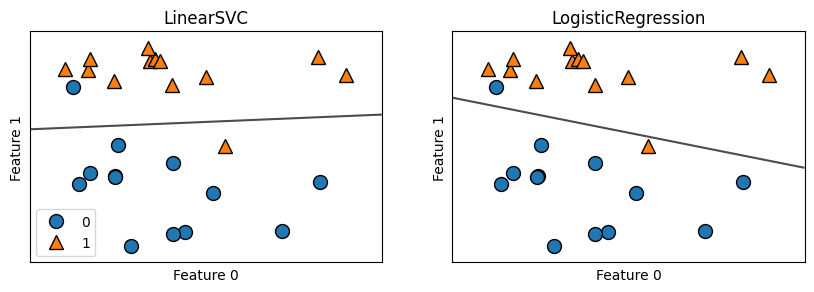

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
 clf = model.fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
 ax=ax, alpha=.7)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{}".format(clf.__class__.__name__))
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")

axes[0].legend()
plt.show()

- In this figure, we have the first feature of the forge dataset on the x-axis and the sec‐
ond feature on the y-axis, as before. We display the decision boundaries found by
LinearSVC and LogisticRegression respectively as straight lines, separating the area
classified as class 1 on the top from the area classified as class 0 on the bottom. In
other words, any new data point that lies above the black line will be classified as class
1 by the respective classifier, while any point that lies below the black line will be clas‐
sified as class 0.

- The two models come up with similar decision boundaries. Note that both misclas‐
sify two of the points. By default, both models apply an L2 regularization, in the same
way that Ridge does for regression.

- For LogisticRegression and LinearSVC the trade-off parameter that determines the
strength of the regularization is called C, and higher values of C correspond to less regularization. In other words, when you use a high value for the parameter C, Logis
ticRegression and LinearSVC try to fit the training set as best as possible, while with
low values of the parameter C, the models put more emphasis on finding a coefficient
vector (w) that is close to zero.

- There is another interesting aspect of how the parameter C acts. Using low values of C
will cause the algorithms to try to adjust to the “majority” of data points, while using
a higher value of C stresses the importance that each individual data point be classi‐
fied correctly. Here is an illustration using LinearSVC

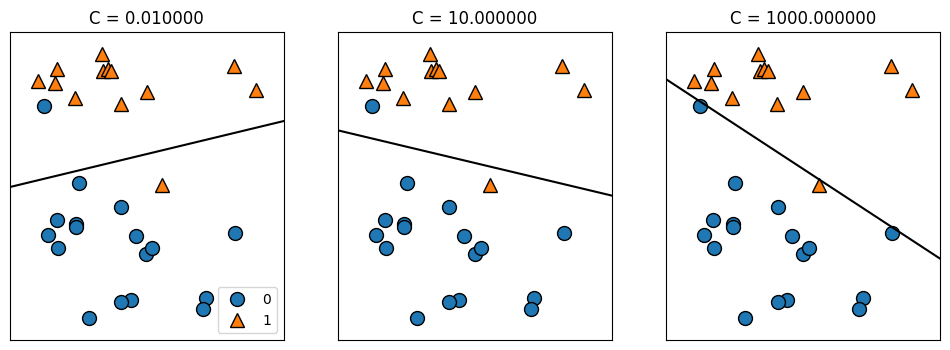

In [25]:
mglearn.plots.plot_linear_svc_regularization()

- On the lefthand side, we have a very small C corresponding to a lot of regularization.
Most of the points in class 0 are at the top, and most of the points in class 1 are at the
bottom. The strongly regularized model chooses a relatively horizontal line, misclas‐
sifying two points. In the center plot, C is slightly higher, and the model focuses more
on the two misclassified samples, tilting the decision boundary. Finally, on the right‐
hand side, the very high value of C in the model tilts the decision boundary a lot, now
correctly classifying all points in class 0. One of the points in class 1 is still misclassi‐
fied, as it is not possible to correctly classify all points in this dataset using a straight
line. The model illustrated on the righthand side tries hard to correctly classify all
points, but might not capture the overall layout of the classes well. In other words,
this model is likely overfitting.

- Similarly to the case of regression, linear models for classification might seem very
restrictive in low-dimensional spaces, only allowing for decision boundaries that are
straight lines or planes. Again, in high dimensions, linear models for classification

- become very powerful, and guarding against overfitting becomes increasingly impor‐
tant when considering more features.

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

# Create and train the LogisticRegression model
# Use the 'liblinear' solver and increase the max_iter if necessary
logreg = LogisticRegression(solver='liblinear', max_iter=10000).fit(X_train, y_train)

# Print the training and test set scores
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.953
Test set score: 0.958


The default value of C=1 provides quite good performance, with 95% accuracy on
both the training and the test set. But as training and test set performance are very
close, it is likely that we are underfitting. Let’s try to increase C to fit a more flexible
model:


In [29]:
# Create and train the LogisticRegression model with C=100
logreg100 = LogisticRegression(C=100, solver='liblinear', max_iter=10000).fit(X_train, y_train)

# Print the training and test set scores
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.977
Test set score: 0.965


In [33]:
# Create and train the LogisticRegression model with C=100
logreg001 = LogisticRegression(C=0.01, solver='liblinear', max_iter=10000).fit(X_train, y_train)

# Print the training and test set scores
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


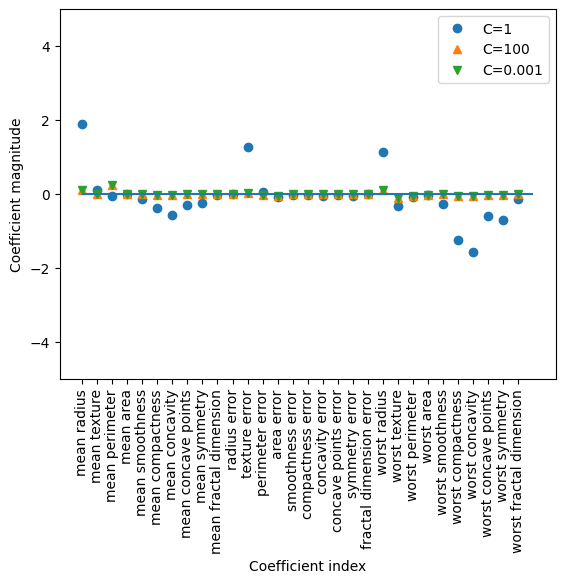

In [34]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


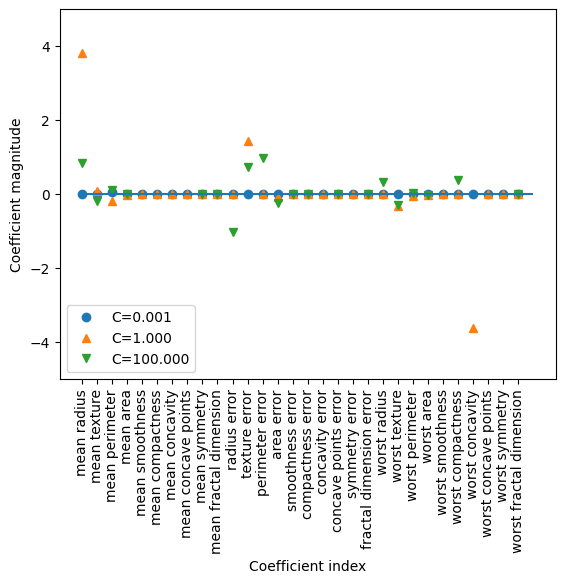

In [36]:
# Iterate over different values of C and markers
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    # Create and train the LogisticRegression model with L1 penalty
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear', max_iter=10000).fit(X_train, y_train)

    # Print the training and test accuracy
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))

    # Plot the coefficients
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

# Set the x-ticks and labels
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
# Plot a horizontal line at y=0
plt.hlines(0, 0, cancer.data.shape[1])
# Set the axis labels and limits
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
# Add a legend
plt.legend(loc=3)

# Show the plot
plt.show()

## Linear models for multiclass classification

- Many linear classification models are for binary classification only, and don’t extend
naturally to the multiclass case (with the exception of logistic regression). A common
technique to extend a binary classification algorithm to a multiclass classification
algorithm is the one-vs.-rest approach. In the one-vs.-rest approach, a binary model is
learned for each class that tries to separate that class from all of the other classes,
resulting in as many binary models as there are classes. To make a prediction, all
binary classifiers are run on a test point. The classifier that has the highest score on its
single class “wins,” and this class label is returned as the prediction

- Having one binary classifier per class results in having one vector of coefficients (w)
and one intercept (b) for each class. The class for which the result of the classification
confidence formula given here is highest is the assigned class label:

- w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

- The mathematics behind multiclass logistic regression differ somewhat from the onevs.-rest approach, but they also result in one coefficient vector and intercept per class,
and the same method of making a prediction is applied.

- Let’s apply the one-vs.-rest method to a simple three-class classification dataset. We
use a two-dimensional dataset, where each class is given by data sampled from a
Gaussian distribution

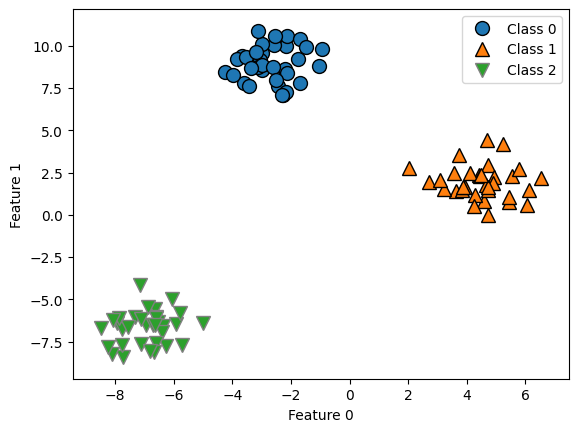

In [37]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])


In [39]:
linear_svm = LinearSVC(max_iter=10000).fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


We see that the shape of the coef_ is (3, 2), meaning that each row of coef_ con‐
tains the coefficient vector for one of the three classes and each column holds the
coefficient value for a specific feature (there are two in this dataset). The intercept_
is now a one-dimensional array, storing the intercepts for each class.

Let’s visualize the lines given by the three binary classifiers (Figure 2-20):

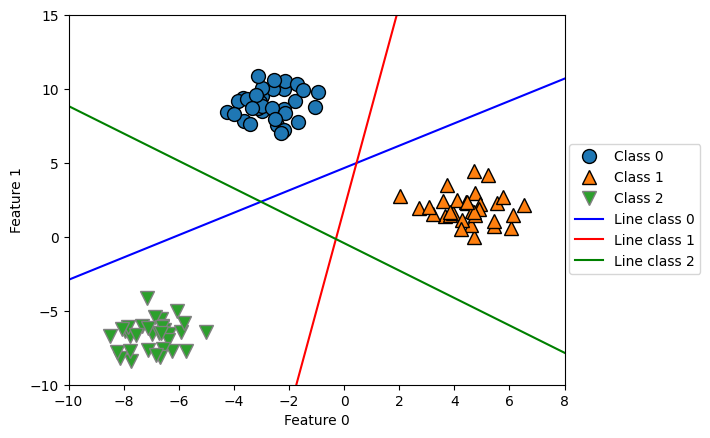

In [41]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))

plt.show()

- You can see that all the points belonging to class 0 in the training data are above the
line corresponding to class 0, which means they are on the “class 0” side of this binary
classifier. The points in class 0 are above the line corresponding to class 2, which
means they are classified as “rest” by the binary classifier for class 2. The points
belonging to class 0 are to the left of the line corresponding to class 1, which means
the binary classifier for class 1 also classifies them as “rest.” Therefore, any point in
this area will be classified as class 0 by the final classifier (the result of the classifica‐
tion confidence formula for classifier 0 is greater than zero, while it is smaller than
zero for the other two classes).

- But what about the triangle in the middle of the plot? All three binary classifiers clas‐
sify points there as “rest.” Which class would a point there be assigned to? The answer
is the one with the highest value for the classification formula: the class of the closest
line.


Text(0, 0.5, 'Feature 1')

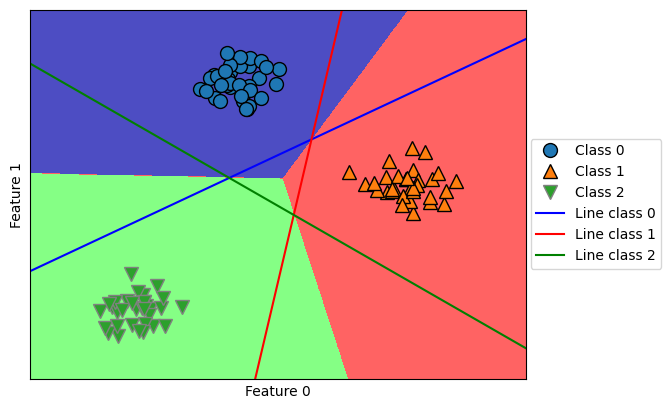

In [42]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Summary of Linear Models: Strengths, Weaknesses, and Parameters

Parameters
- Regularization Parameter:
  - Alpha (α) in regression models
  - C in LinearSVC and LogisticRegression
  - Effect:
    - Large α or small C → simpler models
    - Small α or large C → more complex models
- Search Strategy:
  - Typically searched on a logarithmic scale.
- Regularization Type:
  - L1 Regularization:
    - Use if only a few features are important.
    - Helps with model interpretability by using fewer features.
  - L2 Regularization:
    - Default choice if many features are important.

Strengths
- Speed:
  - Fast to train and predict.
  - Scalable to very large datasets.
- Sparse Data:
  - Effective with sparse datasets.
- Large Datasets:
  - For datasets with hundreds of thousands or millions of samples:
    - Consider solver='sag' in LogisticRegression and Ridge.
    - SGDClassifier and SGDRegressor for more scalable versions.
- Interpretability:
  - Relatively easy to understand predictions using regression and classification formulas.

Weaknesses
- Coefficient Interpretation:
  - Often unclear why coefficients take specific values.
  - Hard to interpret with highly correlated features.

Practical Considerations
- Choosing Regularization:
  - Use L1 for interpretability and when few features matter.
  - Default to L2 for general use.
- Scalability:
  - solver='sag' for large datasets in LogisticRegression and Ridge.
  - SGDClassifier and SGDRegressor for highly scalable linear models.

Linear models offer a balance of simplicity, speed, and scalability, making them suitable for large datasets and sparse data. Regularization type and parameter tuning are crucial for optimizing performance and interpretability.




---

## Naive Bayes Classifiers

- Naive Bayes classifiers are a family of classifiers that are quite similar to the linear
models discussed in the previous section. However, they tend to be even faster in
training. The price paid for this efficiency is that naive Bayes models often provide
generalization performance that is slightly worse than that of linear classifiers like
LogisticRegression and LinearSVC.

- The reason that naive Bayes models are so efficient is that they learn parameters by
looking at each feature individually and collect simple per-class statistics from each
feature. There are three kinds of naive Bayes classifiers implemented in scikit-learn: GaussianNB, BernoulliNB, and MultinomialNB. GaussianNB can be applied to
any continuous data, while BernoulliNB assumes binary data and MultinomialNB
assumes count data (that is, that each feature represents an integer count of some‐
thing, like how often a word appears in a sentence). BernoulliNB and MultinomialNB
are mostly used in text data classification



In [44]:
# The BernoulliNB classifier counts how often every feature of each class is not zero.
# This is most easily understood with an example.


X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])

y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
 # iterate over each class
 # count (sum) entries of 1 per feature
 counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))


Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


- The other two naive Bayes models, MultinomialNB and GaussianNB, are slightly dif‐
ferent in what kinds of statistics they compute. MultinomialNB takes into account the
average value of each feature for each class, while GaussianNB stores the average value
as well as the standard deviation of each feature for each class.

- To make a prediction, a data point is compared to the statistics for each of the classes,
and the best matching class is predicted. Interestingly, for both MultinomialNB and
BernoulliNB, this leads to a prediction formula that is of the same form as in the lin‐
ear models (see “Linear models for classification” on page 56). Unfortunately, coef_
for the naive Bayes models has a somewhat different meaning than in the linear mod‐
els, in that coef_ is not the same as w.



---

## Strengths, weaknesses, and parameters

- MultinomialNB and BernoulliNB have a single parameter, alpha, which controls
model complexity. The way alpha works is that the algorithm adds to the data alpha
many virtual data points that have positive values for all the features. This results in a
“smoothing” of the statistics. A large alpha means more smoothing, resulting in less
complex models. The algorithm’s performance is relatively robust to the setting of
alpha, meaning that setting alpha is not critical for good performance. However,
tuning it usually improves accuracy somewhat.

- GaussianNB is mostly used on very high-dimensional data, while the other two var‐
iants of naive Bayes are widely used for sparse count data such as text. MultinomialNB
usually performs better than BinaryNB, particularly on datasets with a relatively large
number of nonzero features (i.e., large documents).

- The naive Bayes models share many of the strengths and weaknesses of the linear
models. They are very fast to train and to predict, and the training procedure is easy
to understand. The models work very well with high-dimensional sparse data and are
relatively robust to the parameters. Naive Bayes models are great baseline models and
are often used on very large datasets, where training even a linear model might take
too long.




---

Introduction to Decision Trees

Decision trees are a versatile and powerful machine learning algorithm used for both classification and regression tasks. They work by recursively splitting the data into subsets based on feature values, forming a tree-like structure of decision nodes and leaf nodes. Each internal node represents a decision on a feature, each branch represents the outcome of the decision, and each leaf node represents a final prediction or classification.

Key Concepts

- Nodes:
  - Root Node: The topmost node representing the entire dataset.
  - Decision Node: Internal nodes where the data is split based on a feature.
  - Leaf Node: Terminal nodes representing the final output or class.

- Splitting:
  - Decision trees split nodes based on certain criteria like Gini impurity, information gain, or mean squared error, aiming to create the purest child nodes.

- Pruning:
  - Pruning techniques are used to remove sections of the tree that may lead to overfitting, enhancing the model's ability to generalize to unseen data.

Advantages

- Interpretability:
  - Easy to visualize and understand, making them suitable for presenting results to non-technical stakeholders.
- Non-parametric:
  - They do not assume any underlying distribution of the data.
- Feature Importance:
  - Provide insights into the most significant features for prediction.

Disadvantages

- Overfitting:
  - Can easily overfit the training data, especially if the tree is deep.
- Instability:
  - Small changes in the data can result in different splits, leading to an entirely different tree structure.

Practical Applications

- Classification: Used in various domains like finance for credit scoring, healthcare for diagnosing diseases, and marketing for customer segmentation.
- Regression: Employed to predict continuous values such as house prices or stock market trends.

Popular Variants

- Random Forests:
  - An ensemble method that builds multiple decision trees and merges their results to improve accuracy and control overfitting.
- Gradient Boosted Trees:
  - Another ensemble technique that builds trees sequentially, each one correcting errors from the previous tree, enhancing performance.

Decision trees are an essential tool in the machine learning toolkit, offering a balance of simplicity and power, particularly valuable for their interpretability and ease of use.


In [45]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.937


- As expected, the accuracy on the training set is 100%—because the leaves are pure,
the tree was grown deep enough that it could perfectly memorize all the labels on the
training data. The test set accuracy is slightly worse than for the linear models we
looked at previously, which had around 95% accuracy.

- If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep
and complex. Unpruned trees are therefore prone to overfitting and not generalizing
well to new data. Now let’s apply pre-pruning to the tree, which will stop developing
the tree before we perfectly fit to the training data. One option is to stop building the
tree after a certain depth has been reached. Here we set max_depth=4, meaning only
four consecutive questions can be asked (cf. Figures 2-24 and 2-26). Limiting the
depth of the tree decreases overfitting. This leads to a lower accuracy on the training
set, but an improvement on the test set:

In [46]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.951


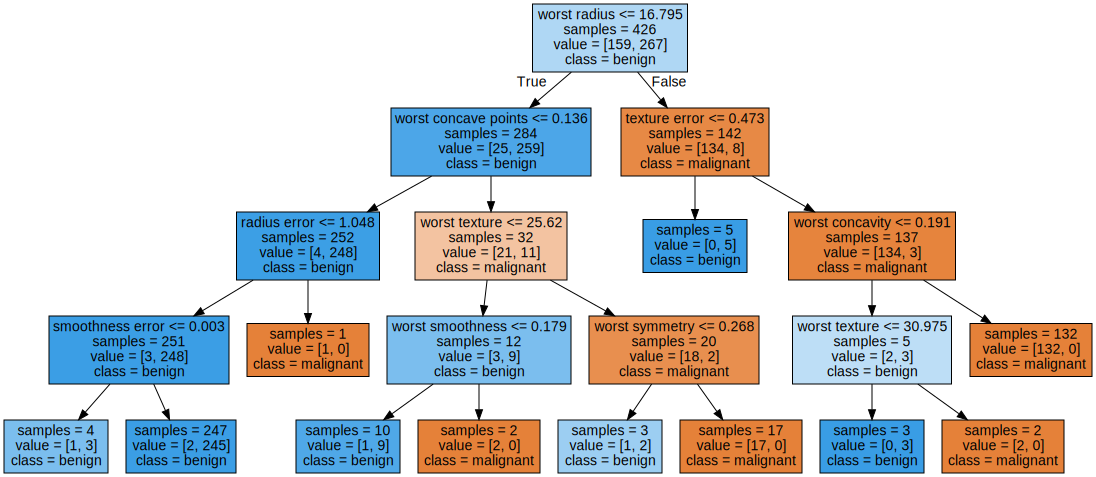

In [48]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
 feature_names=cancer.feature_names, impurity=False, filled=True)


import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)


In [49]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


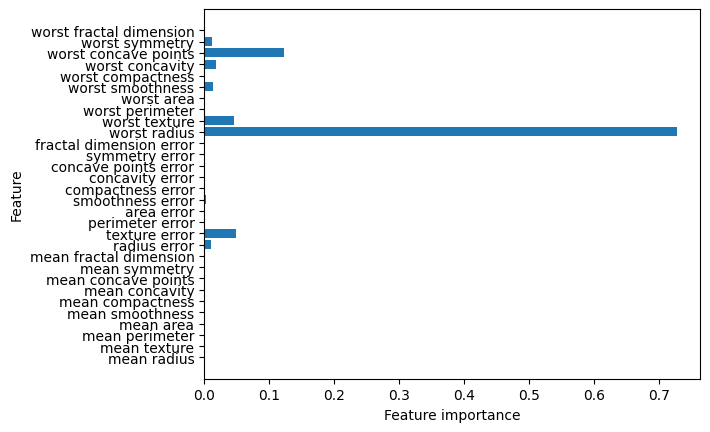

In [50]:
def plot_feature_importances_cancer(model):
 n_features = cancer.data.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), cancer.feature_names)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


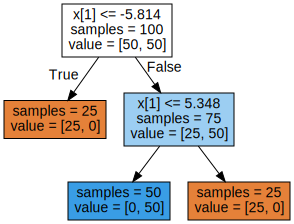

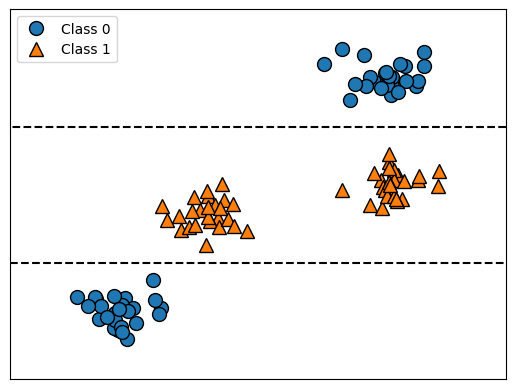

In [51]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)


- The plot shows a dataset with two features and two classes. Here, all the information
is contained in X[1], and X[0] is not used at all. But the relation between X[1] and the output class is not monotonous, meaning we cannot say “a high value of X[0]
means class 0, and a low value means class 1” (or vice versa).

- While we focused our discussion here on decision trees for classification, all that was
said is similarly true for decision trees for regression, as implemented in Decision
TreeRegressor. The usage and analysis of regression trees is very similar to that of
classification trees. There is one particular property of using tree-based models for
regression that we want to point out, though. The DecisionTreeRegressor (and all
other tree-based regression models) is not able to extrapolate, or make predictions
outside of the range of the training data.

- Let’s look into this in more detail, using a dataset of historical computer memory
(RAM) prices. Figure 2-31 shows the dataset, with the date on the x-axis and the price
of one megabyte of RAM in that year on the y-axis:


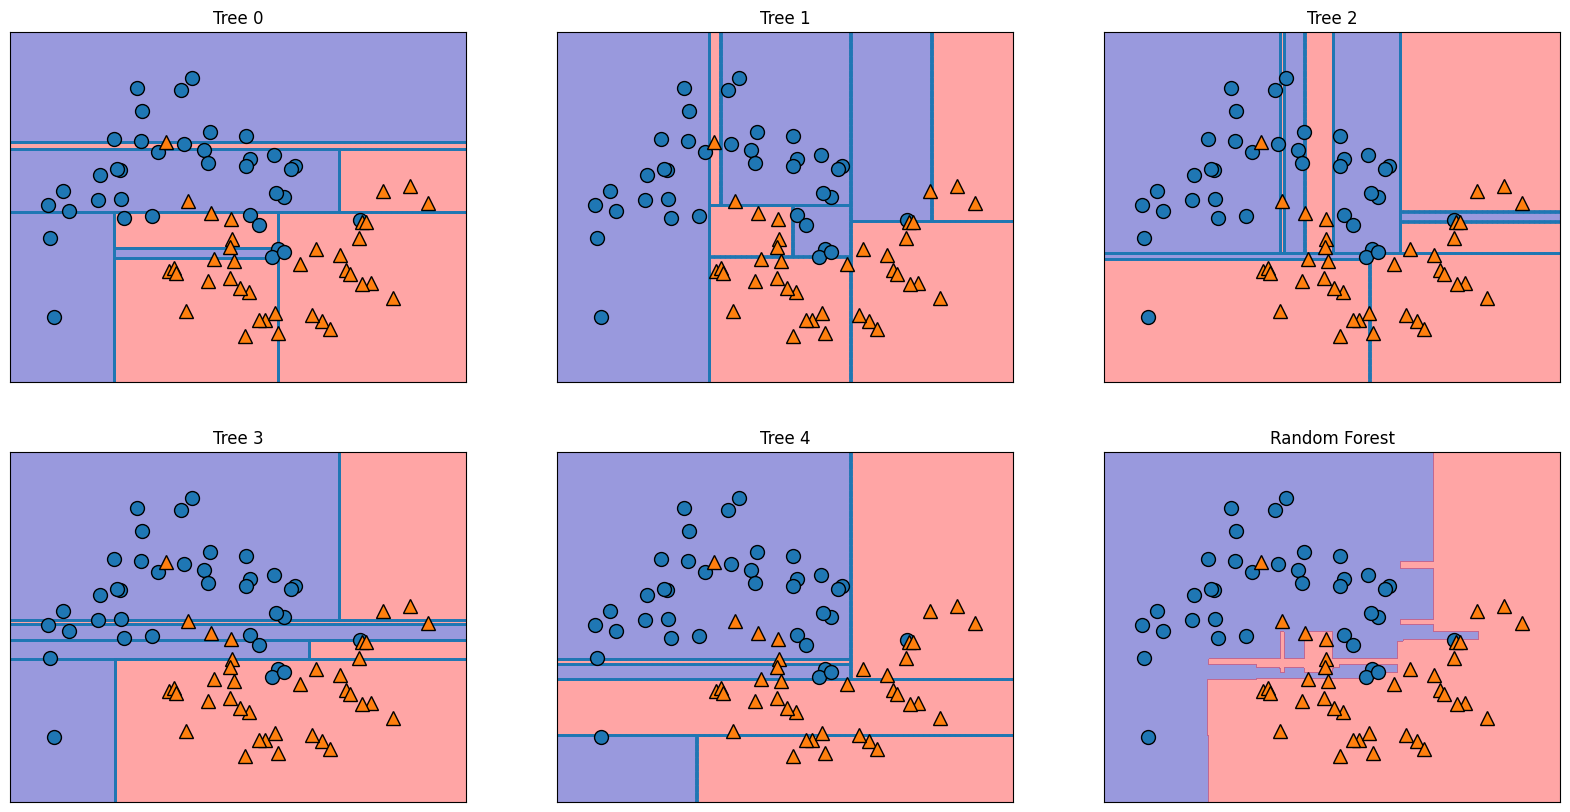

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

'''
The trees that are built as part of the random forest are stored in the estimator_
attribute. Let’s visualize the decision boundaries learned by each tree, together with
their aggregate prediction as made by the forest
'''

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
 ax.set_title("Tree {}".format(i))
 mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
 alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

'''
You can clearly see that the decision boundaries learned by the five trees are quite dif‐
ferent. Each of them makes some mistakes, as some of the training points that are
plotted here were not actually included in the training sets of the trees, due to the
bootstrap sampling.
The random forest overfits less than any of the trees individually, and provides a
much more intuitive decision boundary. In any real application, we would use many
more trees (often hundreds or thousands), leading to even smoother boundaries.
'''
print()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.972


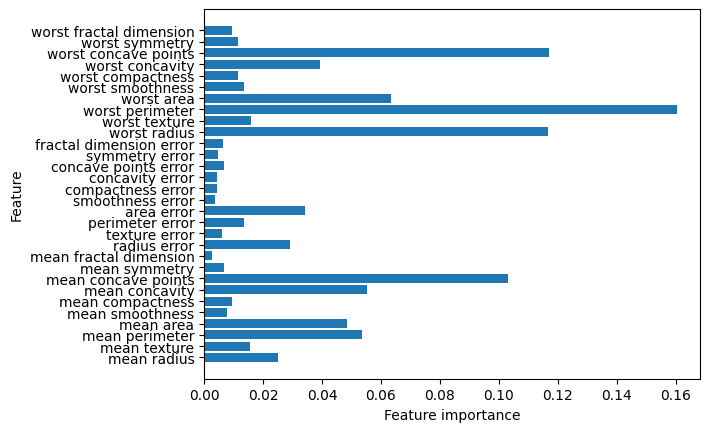

In [57]:
plot_feature_importances_cancer(forest)

## Gradient boosted regression trees (gradient boosting machines)

- The gradient boosted regression tree is another ensemble method that combines mul‐
tiple decision trees to create a more powerful model. Despite the “regression” in the
name, these models can be used for regression and classification. In contrast to the
random forest approach, gradient boosting works by building trees in a serial man‐
ner, where each tree tries to correct the mistakes of the previous one. By default, there
is no randomization in gradient boosted regression trees; instead, strong pre-pruning
is used. Gradient boosted trees often use very shallow trees, of depth one to five,
which makes the model smaller in terms of memory and makes predictions faster.

- The main idea behind gradient boosting is to combine many simple models (in this
context known as weak learners), like shallow trees. Each tree can only provide good
predictions on part of the data, and so more and more trees are added to iteratively
improve performance.

- Gradient boosted trees are frequently the winning entries in machine learning com‐
petitions, and are widely used in industry. They are generally a bit more sensitive to
parameter settings than random forests, but can provide better accuracy if the param‐
eters are set correctly.

- Apart from the pre-pruning and the number of trees in the ensemble, another impor‐
tant parameter of gradient boosting is the learning_rate, which controls how
strongly each tree tries to correct the mistakes of the previous trees. A higher learning
rate means each tree can make stronger corrections, allowing for more complex mod‐
els. Adding more trees to the ensemble, which can be accomplished by increasing
n_estimators, also increases the model complexity, as the model has more chances
to correct mistakes on the training set.

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [59]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [60]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.965


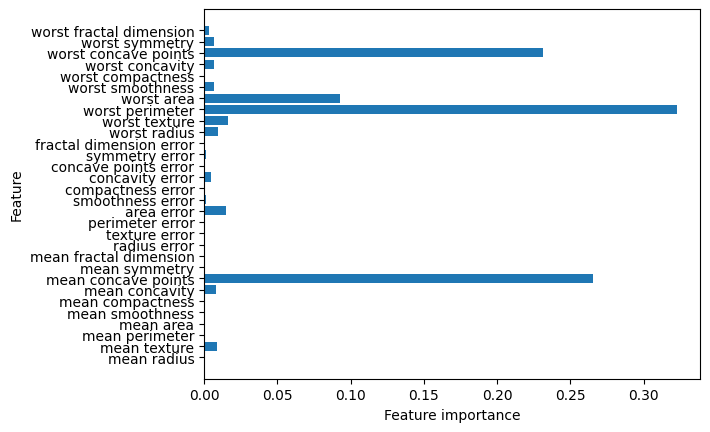

In [63]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

## Kernelized Support Vector Machines

The next type of supervised model we will discuss is kernelized support vector
machines. We explored the use of linear support vector machines for classification in
“Linear models for classification” on page 56. Kernelized support vector machines
(often just referred to as SVMs) are an extension that allows for more complex mod‐
els that are not defined simply by hyperplanes in the input space. While there are sup‐
port vector machines for classification and regression, we will restrict ourselves to the
classification case, as implemented in SVC. Similar concepts apply to support vector
regression, as implemented in SVR.

The math behind kernelized support vector machines is a bit involved, and is beyond
the scope of this book. You can find the details in Chapter 1 of Hastie, Tibshirani, and
Friedman’s e Elements of Statistical Learning. However, we will try to give you some
sense of the idea behind the method.

Text(0, 0.5, 'Feature 1')

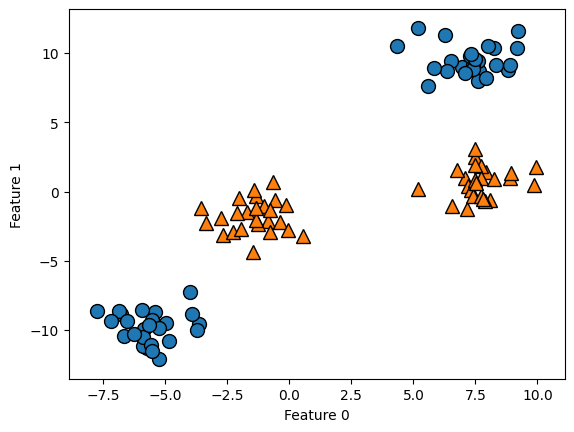

In [64]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


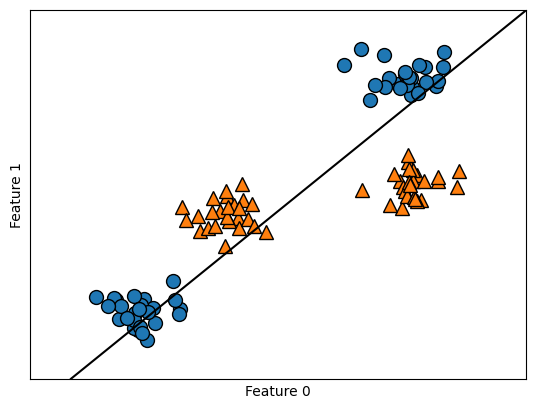

In [66]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.show()

In [67]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

<ipython-input-67-6b78ae8b8451>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
<ipython-input-67-6b78ae8b8451>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',


Text(0.5, 0, 'feature1 ** 2')

<Figure size 640x480 with 0 Axes>

In [68]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-68-e70d0816d633>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
<ipython-input-68-e70d0816d633>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',


Text(0.5, 0, 'feature0 ** 2')

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Feature 1')

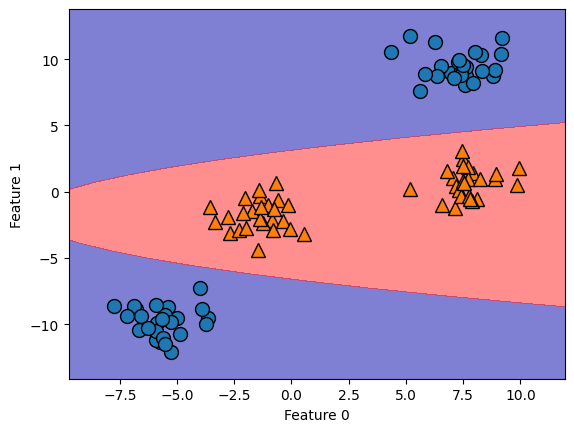

In [69]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
 cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

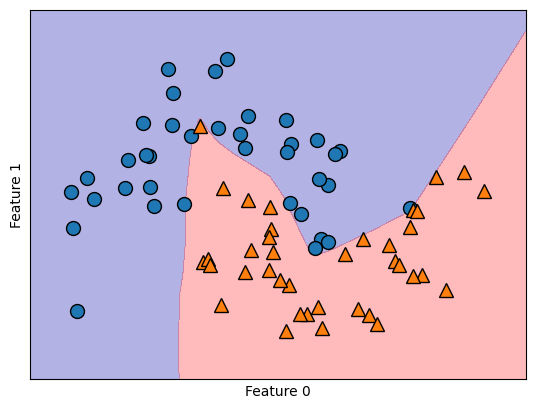

In [73]:
import matplotlib.pyplot as plt
import mglearn
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Create and train the MLPClassifier
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
# Plot the decision boundary
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
# Scatter plot of the training data
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
# Set plot labels
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


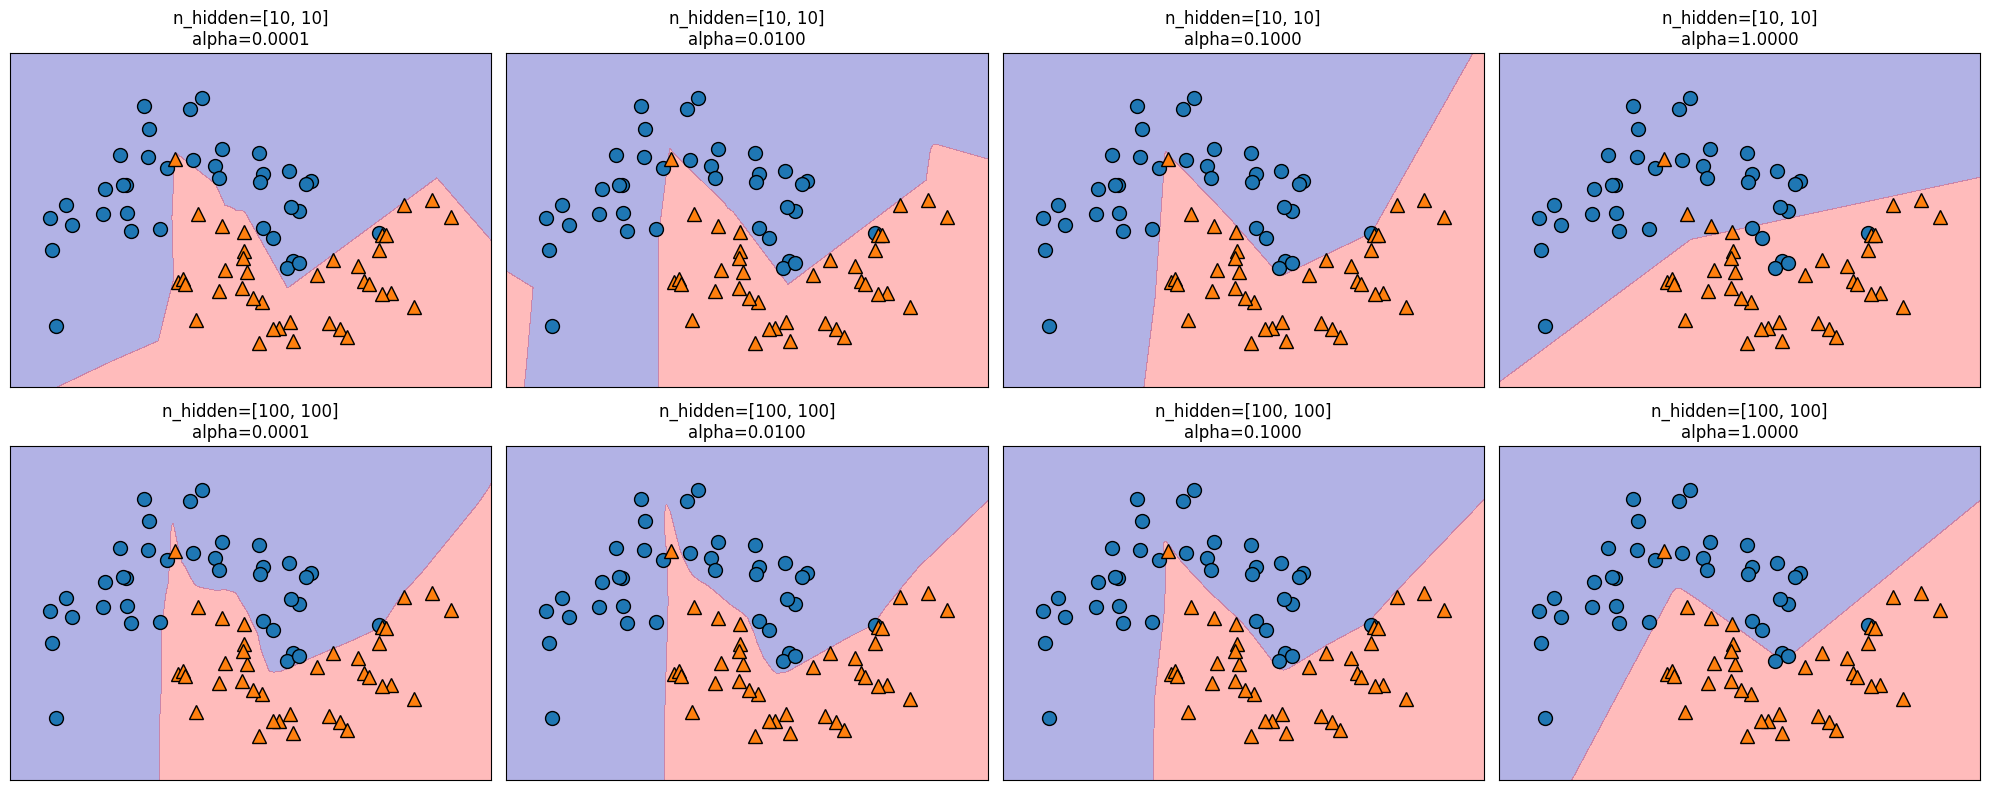

In [76]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        # Create and train the MLPClassifier
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)

        # Plot decision boundary and training data
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

        # Set title for each subplot
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


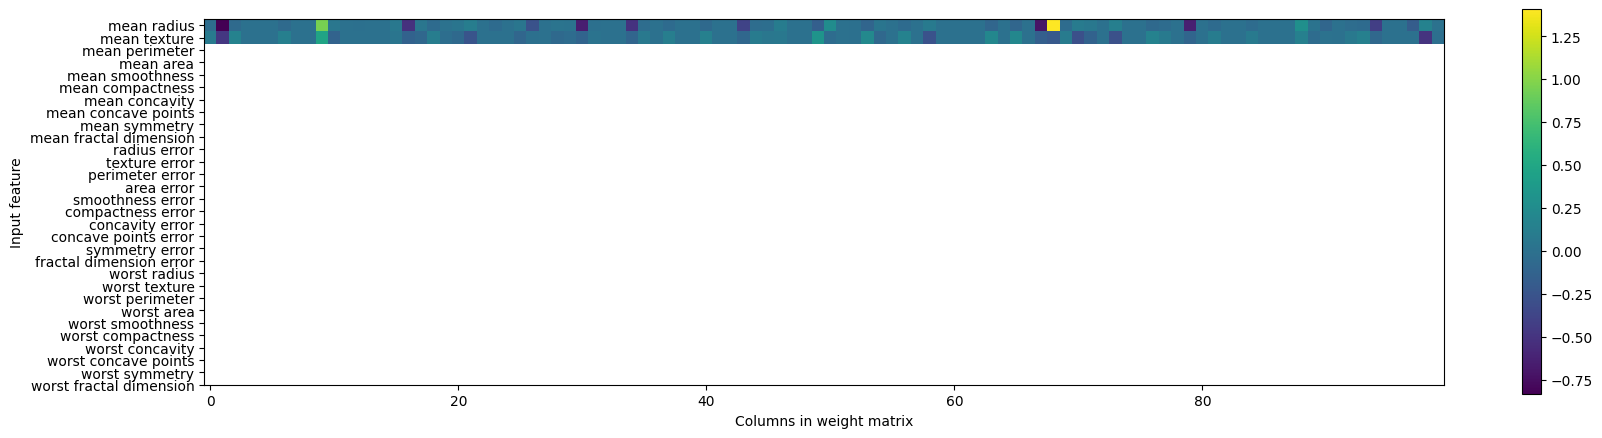

In [81]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()

   ##  !completed...........